Problems
- our data rarely follow a bell curve
- a dichotomization is too simplistic; customers vary accross many relevant variables
- but you may have waaaayyyy too many ... (didn't finish notes)

Solutino: clustering
- cluster is a group of similar objects
- they don't vary along a perfect bell curve
therefore, we want to identify the relevant gropus such that cases are
    - homogeneous within the group (high intra-class similarity)
    - heterogeneous between the groups (low inter-class similarity)
- when do we use clustering
    - market segmentation
    - sales segmentation
    - credit risk
    - employees
    - insurance
    - employees
    - city-planning
    - geographical
- Normalizing is ESSENTIAL
- not perfect if we have different types of data

Types of Clustering
- partitional
- Hierarchical
    - a set of nested clusters organized as a tree
    - CHAID tree
- Euclidean Distance
    - how to calculate clusters
- City-block (Manhattan) Distance

Clustering Allgorithms: k-means
- fix the number of clusters
- calculate theeuclidian distance
- reassign the cluster center
- try each assigned one again against the new centers
- continue until all are clustered

In [48]:
import pandas as pd
import plotly.express as px
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from scipy.spatial import distance as sdist

df = pd.read_csv('personality.csv')
df.head()

,Agreeableness,Extraversion,Intellect,Neuroticism,Conscientiousness,Individualism vs Collectivism,Masculinity vs Femininity,Power Distance,Indulgence vs Restraint,Long term orientation,Uncertainty avoidance
0,4.2,4.0,4.2,2.8,4.6,3.50,3.50,3.50,3.00,4.00,3.00
1,3.6,4.0,3.6,4.6,3.8,3.25,3.00,3.75,2.75,3.25,3.00
2,4.4,4.0,4.2,4.2,4.2,3.75,3.25,3.25,3.50,3.25,2.75
3,4.2,4.0,4.4,3.6,4.8,3.25,3.75,3.25,3.75,4.50,3.00
4,4.6,2.0,3.8,3.4,3.8,3.75,2.75,2.75,3.00,3.50,2.75


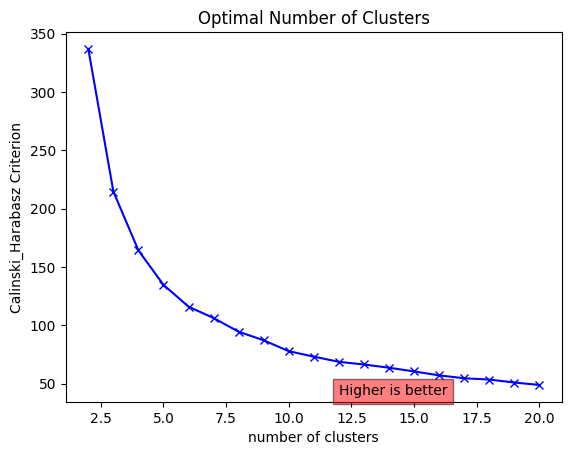

In [49]:
# Calinski and Harabasz Criterion
from sklearn.metrics import calinski_harabasz_score
from matplotlib import pyplot as plt

ch_score = []
for n in range(2, 21):
    kmeans = KMeans(n, random_state=1, n_init='auto').fit(df)
    ch_score.append(calinski_harabasz_score(df, labels=kmeans.labels_))

plt.plot(range(2, 21), ch_score, 'bx-')
plt.xlabel('number of clusters') 
plt.ylabel('Calinski_Harabasz Criterion') 
plt.title('Optimal Number of Clusters')
plt.text(12, 40, 'Higher is better', bbox=dict(facecolor='red', alpha=0.5))
plt.show()

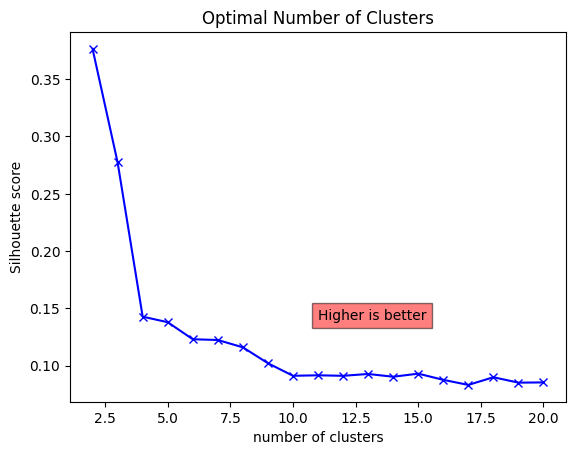

In [50]:
# Silhouette Analysis
from sklearn.metrics import silhouette_score

si_score = []
for n in range(2, 21): # For 2 to 21 potential clusters...
    kmeans = KMeans(n, random_state=1, n_init='auto').fit(df)
    si_score.append(silhouette_score(df, kmeans.labels_))

plt.plot(range(2, 21), si_score, 'bx-')
plt.xlabel('number of clusters') 
plt.ylabel('Silhouette score') 
plt.title('Optimal Number of Clusters')
plt.text(11, .14, 'Higher is better', bbox=dict(facecolor='red', alpha=0.5))
plt.show()

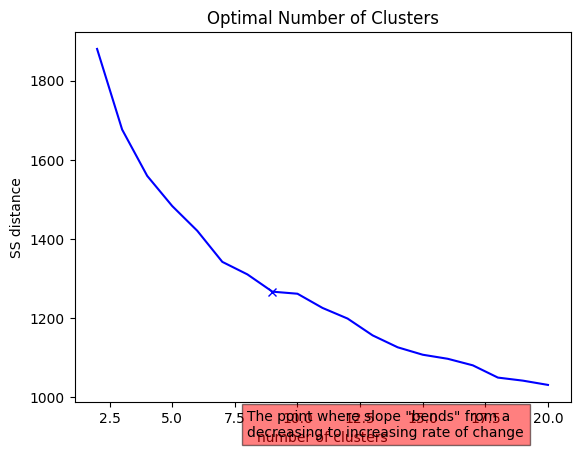

In [51]:
# WCSS: Elbow Method

ss_score = []
for n in range(2,21):
    kmeans = KMeans(n, random_state=1, n_init='auto').fit(df)
    ss_score.append(kmeans.inertia_)
    
# Where does the slope bend? Find the highest (least negative) slope.
changes = []
for n in range(2, 20):
    changes.append(float(ss_score[n - 1] - ss_score[n - 2]))

optimal_n = changes.index(max(changes))

plt.plot(range(2,21), ss_score, 'bx-', markevery=[optimal_n])
plt.xlabel('number of clusters')
plt.ylabel('SS distance')
plt.title('Optimal Number of Clusters')
plt.text(8, 900, 'The point where slope "bends" from a \ndecreasing to increasing rate of change', bbox=dict(facecolor='red', alpha=0.5))
plt.show()

In [52]:
# Train the model
kmeans = KMeans(2, random_state=3, n_init='auto').fit(df)

In [53]:
# Add assigned clusters to a new DataFrame
df['cluster'] = kmeans.labels_
df.head()

,Agreeableness,Extraversion,Intellect,Neuroticism,Conscientiousness,Individualism vs Collectivism,Masculinity vs Femininity,Power Distance,Indulgence vs Restraint,Long term orientation,Uncertainty avoidance,cluster
0,4.2,4.0,4.2,2.8,4.6,3.50,3.50,3.50,3.00,4.00,3.00,1
1,3.6,4.0,3.6,4.6,3.8,3.25,3.00,3.75,2.75,3.25,3.00,1
2,4.4,4.0,4.2,4.2,4.2,3.75,3.25,3.25,3.50,3.25,2.75,1
3,4.2,4.0,4.4,3.6,4.8,3.25,3.75,3.25,3.75,4.50,3.00,1
4,4.6,2.0,3.8,3.4,3.8,3.75,2.75,2.75,3.00,3.50,2.75,1


In [54]:
df_results = pd.DataFrame({'Cluster 0 means':df.loc[df.cluster==0].mean(),
                          'Cluster 1 means':df.loc[df.cluster==1].mean()})
df_results['diff'] = abs(df_results['Cluster 0 means'] - df_results['Cluster 1 means'])
df_results.sort_values(by=['diff'], ascending = False)

,Cluster 0 means,Cluster 1 means,diff
Extraversion,5.557895,3.567713,1.990182
Neuroticism,5.039234,3.315695,1.723539
Agreeableness,5.998086,4.434081,1.564005
Power Distance,4.480861,3.213004,1.267857
Individualism vs Collectivism,4.462919,3.445067,1.017851
cluster,0.000000,1.000000,1.000000
Intellect,4.774163,3.782063,0.992100
Masculinity vs Femininity,3.886364,3.364350,0.522014
Indulgence vs Restraint,3.845694,3.432735,0.412958
Conscientiousness,4.444019,4.076233,0.367786


In [1]:
# Create 3D Scatterplot to visualize cluster

fig = px.scatter_3d(df, x='Extraversion', y='Neuroticism', z='Intellect', color='cluster', size_max=20, opacity=1.0)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

NameError: name 'px' is not defined